# Read data from file (.csv)

In [1]:
import pandas as pd

col_names = ['parents', 'has_nurs', 'form', 'children','housing','finance','social', 'health', 'class']
data = pd.read_csv("./nursery.data.csv", header = None, names=col_names, encoding = 'latin-1')

# Split data into 2 parts 
- x = feature
- y = target

In [2]:
feature_cols = ['parents', 'has_nurs', 'form', 'children','housing','finance','social', 'health']
x = data[col_names[:-1]]
y = data['class']

In [3]:
data_encoded = pd.get_dummies(x, drop_first=True)

# Get proportion for training set and testing set

In [4]:
# List of test size
test_sizes = [0.6, 0.4, 0.2, 0.1]

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)

# Dictionary to store splitted data set on differenct proportion
datasets = {}

for test_size in test_sizes:
    feature_train, feature_test, label_train, label_test = train_test_split(
        data_encoded, y, test_size=test_size, shuffle=True)
    datasets[test_size] = {
        'feature_train': feature_train,
        'feature_test': feature_test,
        'label_train': label_train,
        'label_test': label_test
    }

# Visualize the distribution

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_class_distribution(labels, title):
    class_counts = pd.Series(labels).value_counts()

    plt.figure(figsize=(10, 5))
    sns.barplot(x = class_counts.index, y = class_counts.values, palette = "viridis")
    plt.xlabel('Class', fontsize = 12)
    plt.title(title, fontsize = 20)
    for i, count in enumerate(class_counts.values):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)
    plt.show()

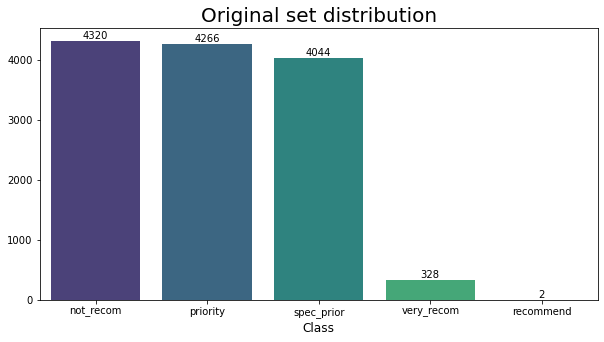

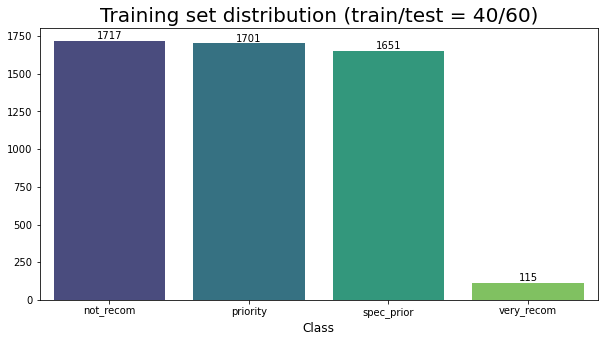

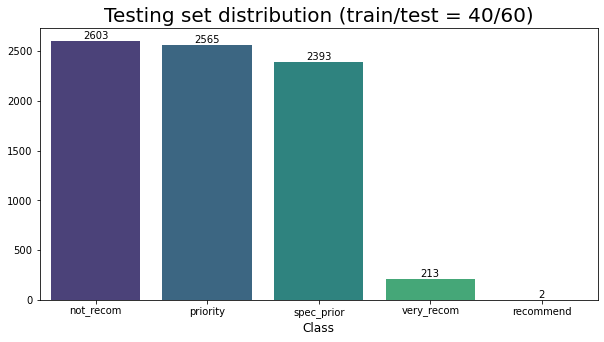

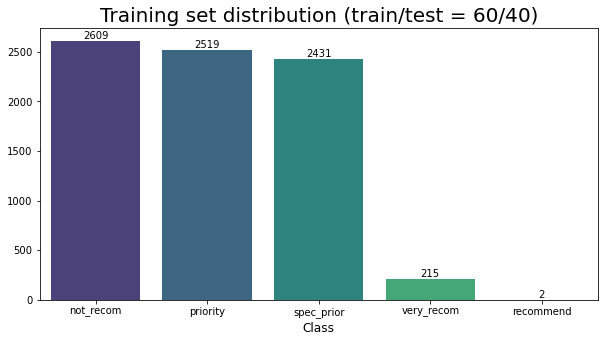

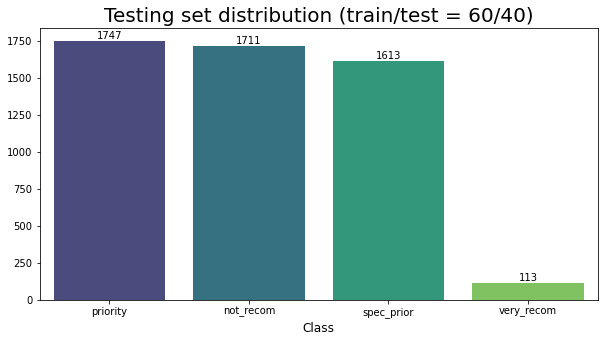

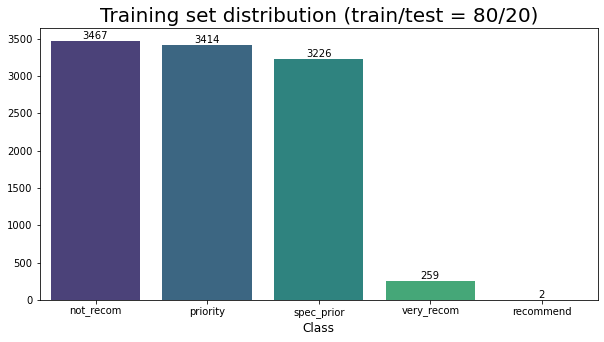

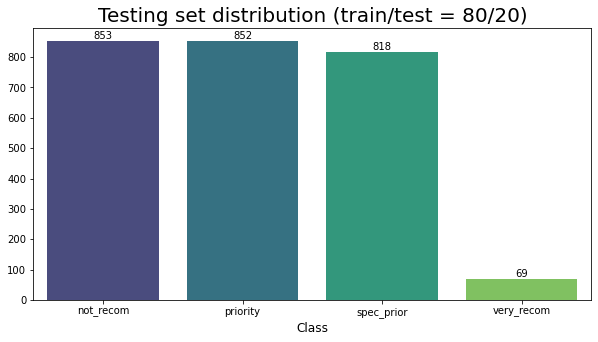

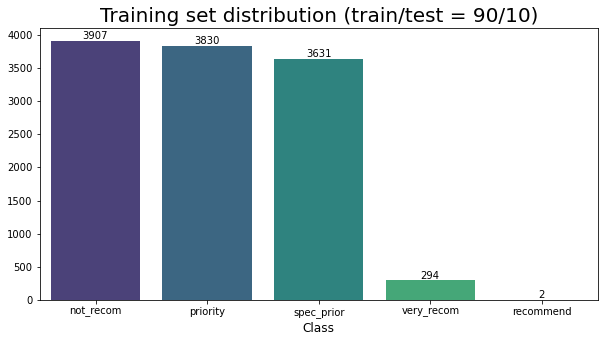

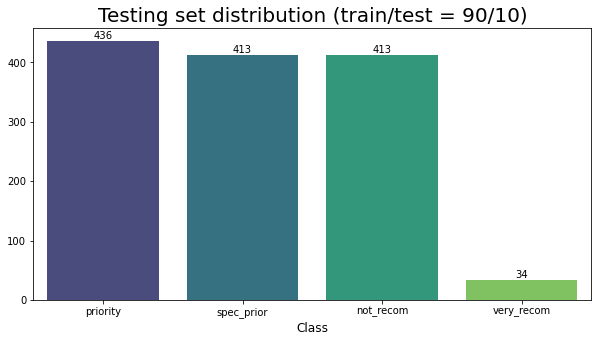

In [7]:
visualize_class_distribution(y, 'Original set distribution')
for test_size, dataset in datasets.items():
    visualize_class_distribution(dataset['label_train'], f'Training set distribution (train/test = {int((1 - test_size) * 100)}/{int(test_size * 100)})')
    visualize_class_distribution(dataset['label_test'], f'Testing set distribution (train/test = {int((1 - test_size) * 100)}/{int(test_size * 100)})')

# Building the Decision tree classifiers

## Building decision tree model

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Assuming 'datasets' is your prepared dictionary with dataset splits
dtc_models = {}
accuracy = {}
label_prediction = {}

# Training models
for test_size, dataset in datasets.items():
    dtc = DecisionTreeClassifier(criterion='entropy')
    dtc.fit(dataset['feature_train'], dataset['label_train'])  # Fitting the model
    label_prediction[test_size] = dtc.predict(dataset['feature_test'])  # Making predictions
    dtc_models[test_size] = dtc  # Storing the model
    accuracy[test_size] = metrics.accuracy_score(dataset['label_test'], label_prediction[test_size])  # Calculating accuracy


## Visualizing Decision Trees

### Decision Tree for (train/test) = 40/60

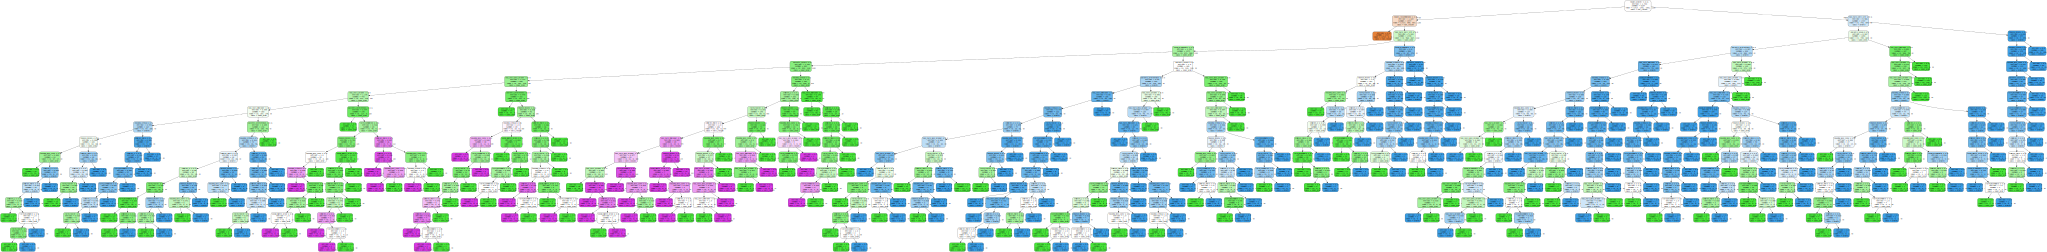


(process:8576): GLib-GIO-WARNING **: 03:08:23.829: Unexpectedly, UWP app `3138AweZip.AweZip_1.4.34.0_x64__ffd303wmbhcjt' (AUMId `3138AweZip.AweZip_ffd303wmbhcjt!App') supports 167 extensions but has no verbs

(process:8576): GLib-GIO-WARNING **: 03:08:23.935: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.313.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs

(process:8576): GLib-GIO-WARNING **: 03:08:24.000: Unexpectedly, UWP app `Clipchamp.Clipchamp_3.0.10220.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:8576): GLib-GIO-WARNING **: 03:08:24.008: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2401.37.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs


### Decision Tree for (train/test) = 60/40

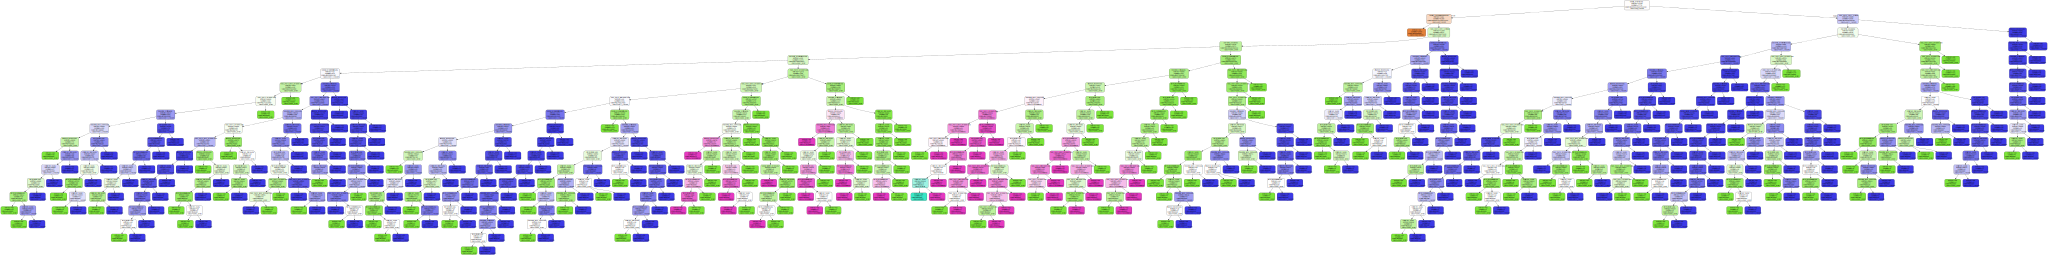


(process:18472): GLib-GIO-WARNING **: 03:08:31.413: Unexpectedly, UWP app `3138AweZip.AweZip_1.4.34.0_x64__ffd303wmbhcjt' (AUMId `3138AweZip.AweZip_ffd303wmbhcjt!App') supports 167 extensions but has no verbs

(process:18472): GLib-GIO-WARNING **: 03:08:31.520: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.313.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs

(process:18472): GLib-GIO-WARNING **: 03:08:31.577: Unexpectedly, UWP app `Clipchamp.Clipchamp_3.0.10220.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:18472): GLib-GIO-WARNING **: 03:08:31.592: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2401.37.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs


### Decision Tree for (train/test) = 80/20

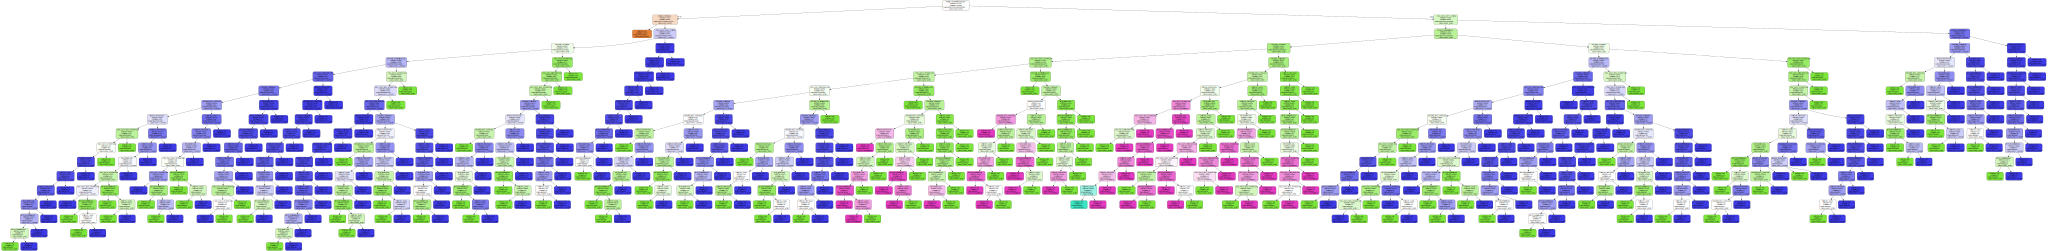


(process:16128): GLib-GIO-WARNING **: 03:08:40.017: Unexpectedly, UWP app `3138AweZip.AweZip_1.4.34.0_x64__ffd303wmbhcjt' (AUMId `3138AweZip.AweZip_ffd303wmbhcjt!App') supports 167 extensions but has no verbs

(process:16128): GLib-GIO-WARNING **: 03:08:40.113: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.313.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs

(process:16128): GLib-GIO-WARNING **: 03:08:40.169: Unexpectedly, UWP app `Clipchamp.Clipchamp_3.0.10220.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:16128): GLib-GIO-WARNING **: 03:08:40.185: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2401.37.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs


### Decision Tree for (train/test) = 90/10

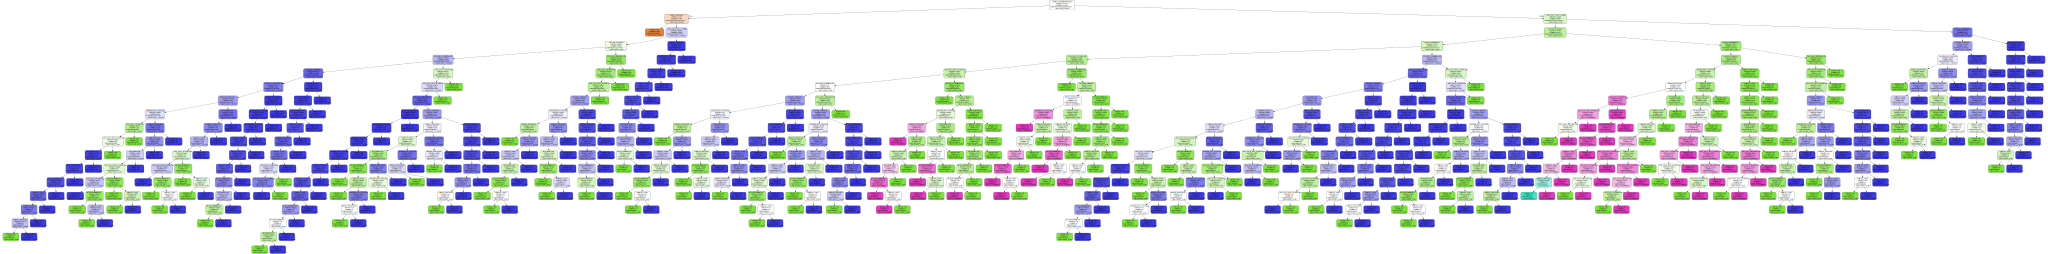


(process:21672): GLib-GIO-WARNING **: 03:08:48.162: Unexpectedly, UWP app `3138AweZip.AweZip_1.4.34.0_x64__ffd303wmbhcjt' (AUMId `3138AweZip.AweZip_ffd303wmbhcjt!App') supports 167 extensions but has no verbs

(process:21672): GLib-GIO-WARNING **: 03:08:48.259: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.313.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs

(process:21672): GLib-GIO-WARNING **: 03:08:48.325: Unexpectedly, UWP app `Clipchamp.Clipchamp_3.0.10220.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:21672): GLib-GIO-WARNING **: 03:08:48.334: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2401.37.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs


In [9]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display, Markdown

# Visualization
for test_size, dtc_model in dtc_models.items():
    # Display the test size information
    display(Markdown(f"### Decision Tree for (train/test) = {int((1 - test_size) * 100)}/{int(test_size * 100)}"))
    # Export as dot file
    dot_data = export_graphviz(dtc_model, out_file=None, 
                               feature_names=dataset['feature_train'].columns, 
                               class_names=dataset['label_train'].unique(), 
                               filled=True, rounded=True, 
                               special_characters=True, label='all')
    
    # Create a graph from dot data
    graph = graphviz.Source(dot_data) 
    
    # Display the graph
    display(graph)
    
    # Export a graph as a (.png) file
    filename = f"decision_tree_{int((1 - test_size) * 100)}_{int(test_size * 100)}"
    graph.render(filename=filename, format='png', cleanup=True)


# Evaluating the decision tree classifiers

### Classification report for (train/test) = 40/60

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      2603
    priority       0.95      0.96      0.95      2565
   recommend       0.00      0.00      0.00         2
  spec_prior       0.98      0.96      0.97      2393
  very_recom       0.79      0.79      0.79       213

    accuracy                           0.97      7776
   macro avg       0.74      0.74      0.74      7776
weighted avg       0.97      0.97      0.97      7776



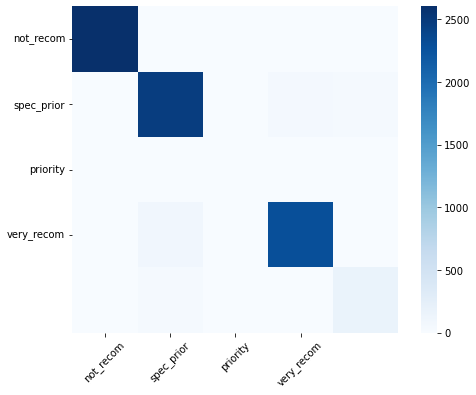

### Classification report for (train/test) = 60/40

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      1711
    priority       0.99      0.99      0.99      1747
   recommend       0.00      0.00      0.00         0
  spec_prior       0.99      0.99      0.99      1613
  very_recom       0.93      0.95      0.94       113

    accuracy                           0.99      5184
   macro avg       0.78      0.78      0.78      5184
weighted avg       0.99      0.99      0.99      5184



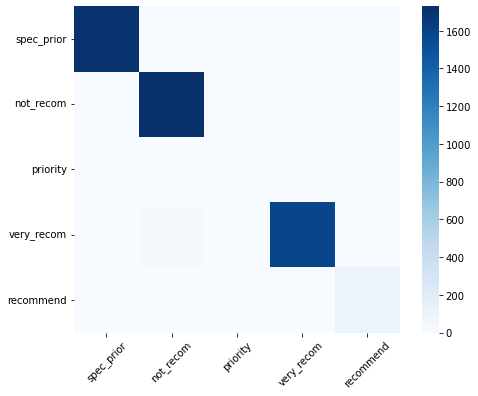

### Classification report for (train/test) = 80/20

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       853
    priority       0.99      0.99      0.99       852
  spec_prior       1.00      0.99      0.99       818
  very_recom       0.97      0.97      0.97        69

    accuracy                           0.99      2592
   macro avg       0.99      0.99      0.99      2592
weighted avg       0.99      0.99      0.99      2592



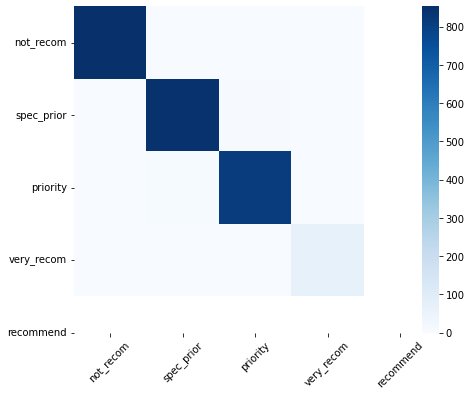

### Classification report for (train/test) = 90/10

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       413
    priority       1.00      1.00      1.00       436
  spec_prior       1.00      1.00      1.00       413
  very_recom       1.00      1.00      1.00        34

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296



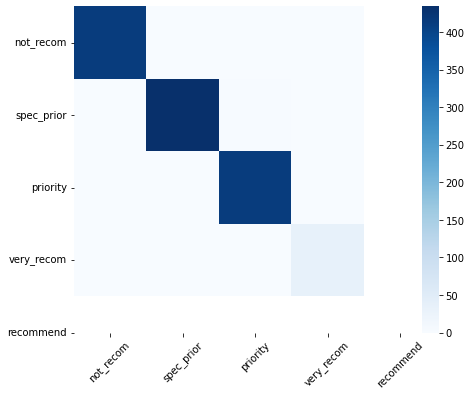

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn 

for test_size, dataset in datasets.items():
    display(Markdown(f"### Classification report for (train/test) = {int((1 - test_size) * 100)}/{int(test_size * 100)}"))
    print(classification_report(dataset['label_test'], label_prediction[test_size], zero_division = 0))

    conf_matrix = confusion_matrix(dataset['label_test'], label_prediction[test_size])
    plt.figure(figsize = (8,6))
    sns.heatmap(conf_matrix, cmap = 'Blues', square = True, xticklabels=dataset['label_train'].unique(), yticklabels=dataset['label_train'].unique())
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# The depth and accuracy of a decision tree

### Decision Tree with max_depth = None

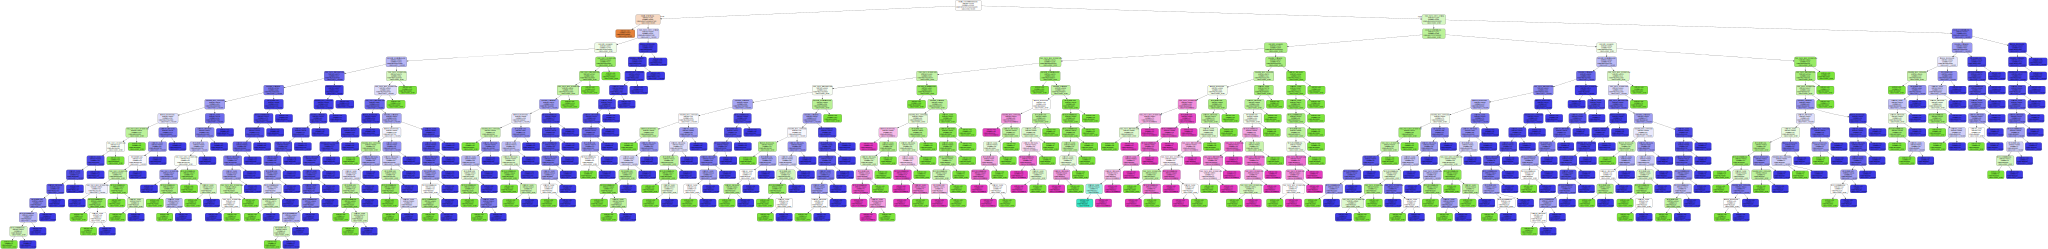


(process:23344): GLib-GIO-WARNING **: 03:08:57.040: Unexpectedly, UWP app `3138AweZip.AweZip_1.4.34.0_x64__ffd303wmbhcjt' (AUMId `3138AweZip.AweZip_ffd303wmbhcjt!App') supports 167 extensions but has no verbs

(process:23344): GLib-GIO-WARNING **: 03:08:57.153: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.313.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs

(process:23344): GLib-GIO-WARNING **: 03:08:57.218: Unexpectedly, UWP app `Clipchamp.Clipchamp_3.0.10220.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:23344): GLib-GIO-WARNING **: 03:08:57.234: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2401.37.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs


With max_depth = None, accuracy = 0.9938271604938271



### Decision Tree with max_depth = 2

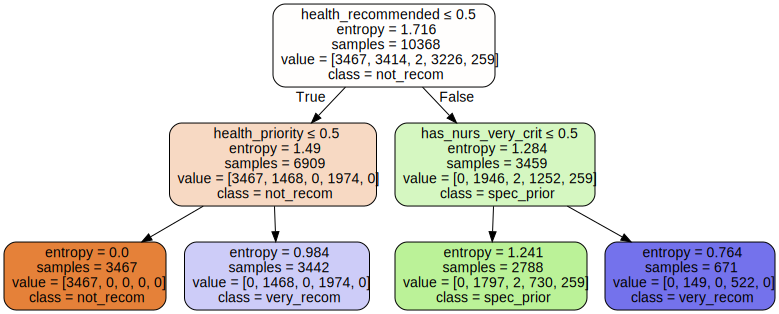

With max_depth = 2, accuracy = 0.7330246913580247



### Decision Tree with max_depth = 3

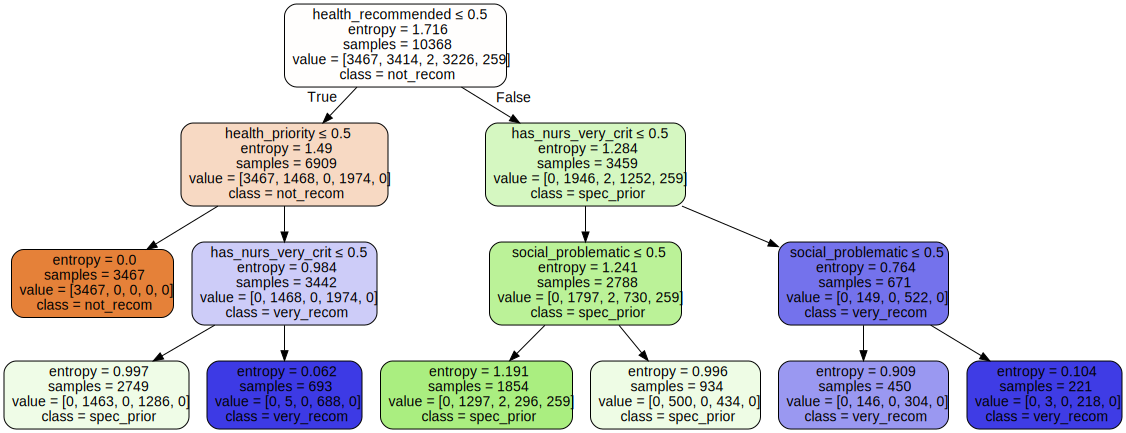

With max_depth = 3, accuracy = 0.7550154320987654



### Decision Tree with max_depth = 4

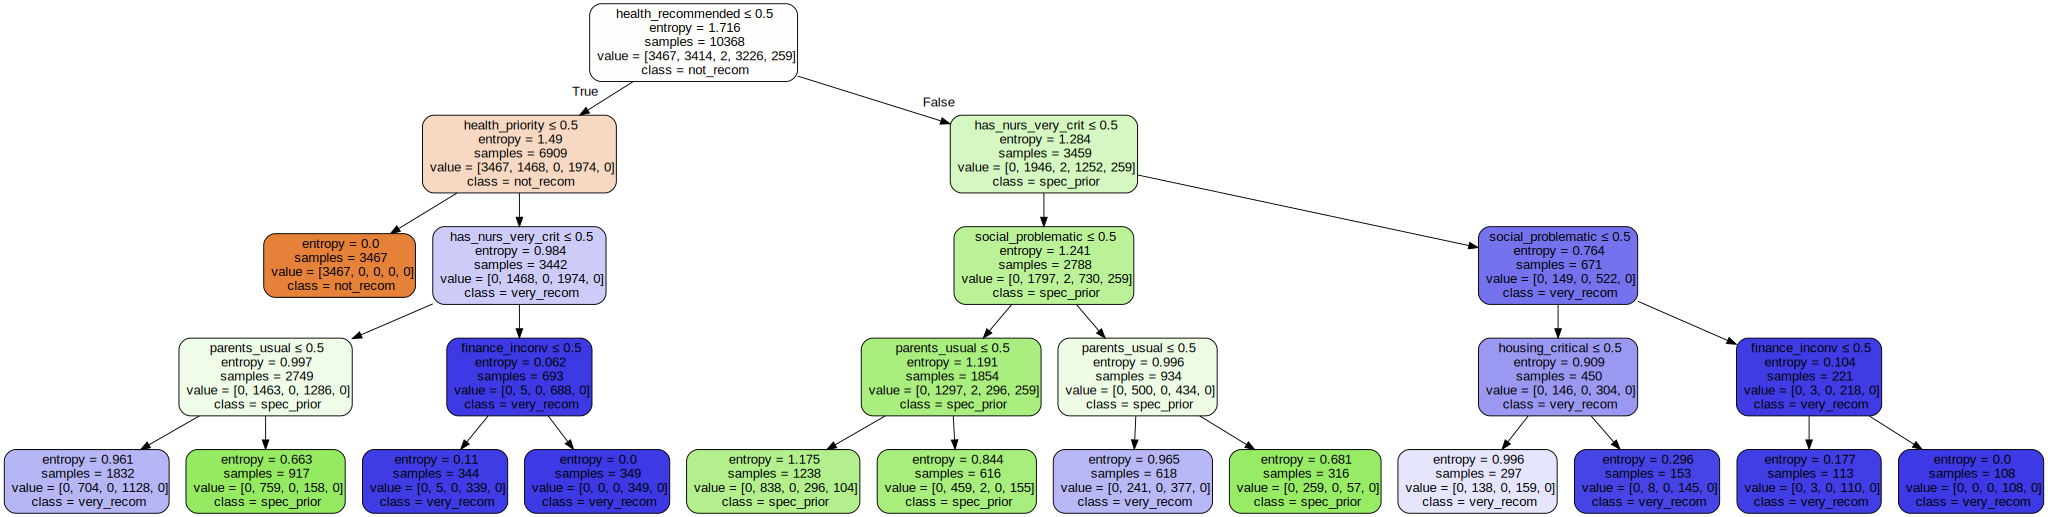

With max_depth = 4, accuracy = 0.8167438271604939



### Decision Tree with max_depth = 5

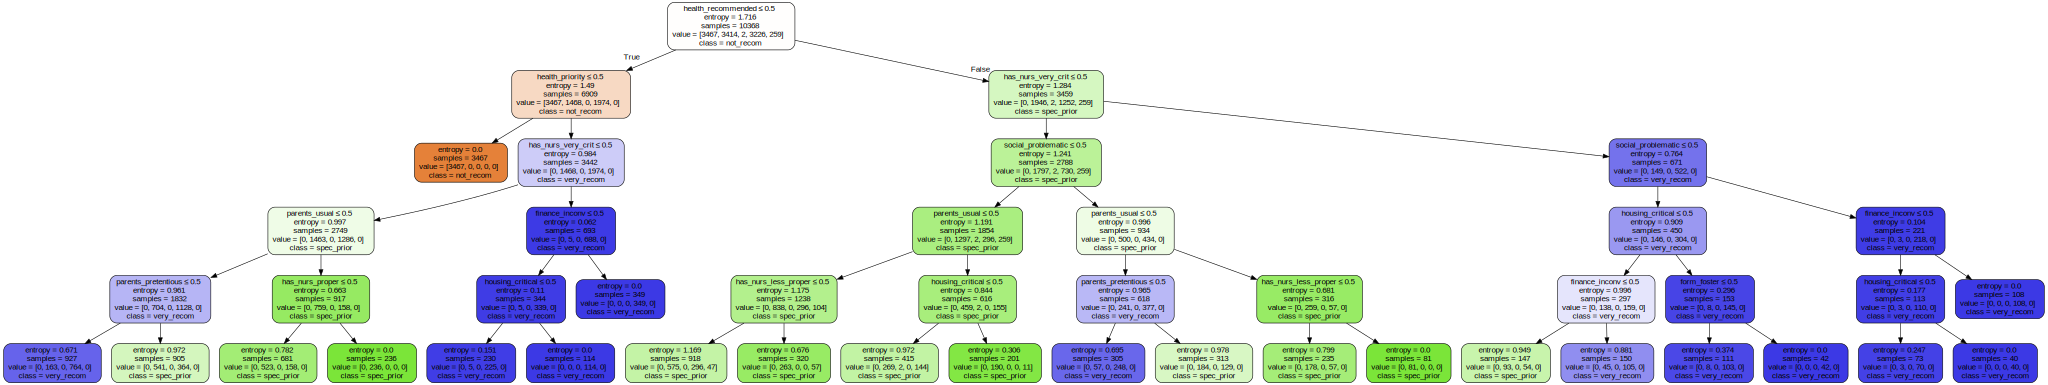

With max_depth = 5, accuracy = 0.8402777777777778



### Decision Tree with max_depth = 6

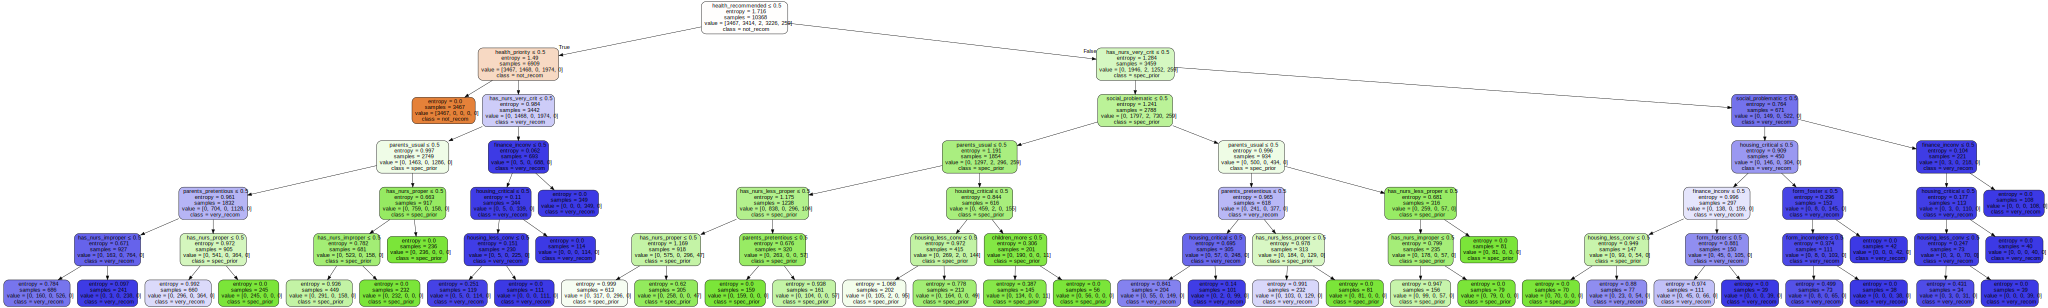

With max_depth = 6, accuracy = 0.8491512345679012



### Decision Tree with max_depth = 7

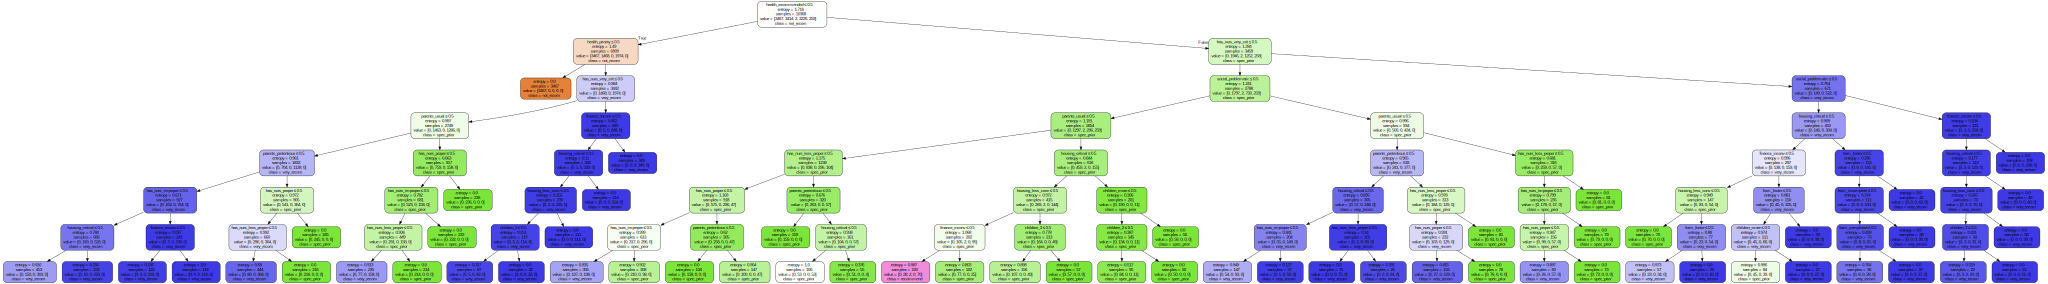

With max_depth = 7, accuracy = 0.9089506172839507



In [11]:
for max_depth in [None, 2, 3, 4, 5, 6, 7]:
    display(Markdown(f"### Decision Tree with max_depth = {max_depth}"))
    
    # Creating a Decision Tree Classifier with max_depth
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dtc.fit(datasets[0.2]['feature_train'], datasets[0.2]['label_train'])
    
    # Calculating prediction
    pred = dtc.predict(datasets[0.2]['feature_test'])
    
    # Calculating accuracy
    accur = metrics.accuracy_score(datasets[0.2]['label_test'], pred)
    
    # Visualize the Decision tree with max_depth
    dot_data = export_graphviz(dtc, out_file=None, 
                               feature_names=datasets[0.2]['feature_train'].columns, 
                               class_names=datasets[0.2]['label_train'].unique(), 
                               filled=True, rounded=True, 
                               special_characters=True, label='all')
    
    # Create a graph from dot data
    graph = graphviz.Source(dot_data) 
    
    # Display the graph
    display(graph)
    
    # Export a graph as a (.png) file
    filename = f"decision_tree_max_depth_{max_depth}"
    graph.render(filename=filename, format='png', cleanup=True)
    
    print(f'With max_depth = {max_depth}, accuracy = {accur}\n')